EMPEZAMOS IMPORTANDO LIBRERIAS Y LOS DATOS HISTORICOS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_excel("C:\\Users\\pacch\\Desktop\\Data\\CodeOp\\Proyecto\\Proyecto_natalidad\\DEMOGRAPHIC_INDICATORS_UN.xlsx", header=1, index_col=None)
df = data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df = df.sort_values(by=['Type', 'Year'])
Countries = df[df['Type'] == 'Country/Area']
Countries = Countries.drop(columns='Population Annual Doubling Time (years)')

EXTRAIGO SOLO LAS COLUMNAS QUE USAR√â

In [3]:
columns = ['Region, subregion, country or area *', 
            'Year',
            'Total Population, as of 1 July (thousands)',
            'Population Density, as of 1 July (persons per square km)',
            'Population Sex Ratio, as of 1 July (males per 100 females)',
            'Median Age, as of 1 July (years)',
            'Natural Change, Births minus Deaths (thousands)',
            'Population Growth Rate (percentage)',
            'Births (thousands)', 
            'Births by women aged 15 to 19 (thousands)',
            'Crude Birth Rate (births per 1,000 population)',
            'Total Fertility Rate (live births per woman)',
            'Net Reproduction Rate (surviving daughters per woman)',
            'Mean Age Childbearing (years)',
            'Sex Ratio at Birth (males per 100 female births)',
            'Total Deaths (thousands)',
            'Crude Death Rate (deaths per 1,000 population)',
            'Life Expectancy at Birth, both sexes (years)',
            'Female Life Expectancy at Birth (years)',
            'Life Expectancy at Age 15, both sexes (years)',
            'Life Expectancy at Age 65, both sexes (years)',
            'Life Expectancy at Age 80, both sexes (years)',
            'Infant Deaths, under age 1 (thousands)',
            'Under-Five Deaths, under age 5 (thousands)',
            'Infant Mortality Rate (infant deaths per 1,000 live births)',
            'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
            'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
            'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
            'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
            'Net Migration Rate (per 1,000 population)'
]

Countries = Countries[columns]

AHORA HACEMOS EL EDA

In [4]:
Countries.columns

Index(['Region, subregion, country or area *', 'Year',
       'Total Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Population Growth Rate (percentage)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Total Deaths (thousands)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Life Expectancy at Birth, both sexes (years)',
       'Female Life Expectancy at Birth (years)',
       'Life Expectancy at Age 15, both sexes (years)',
       

In [5]:
numericas = list(Countries.drop(columns='Region, subregion, country or area *'))
Countries[numericas] = Countries[numericas].apply(pd.to_numeric, errors='coerce')
print(Countries.shape)

(17538, 30)


Verificaci√≥n de la distribuci√≥n de los datos

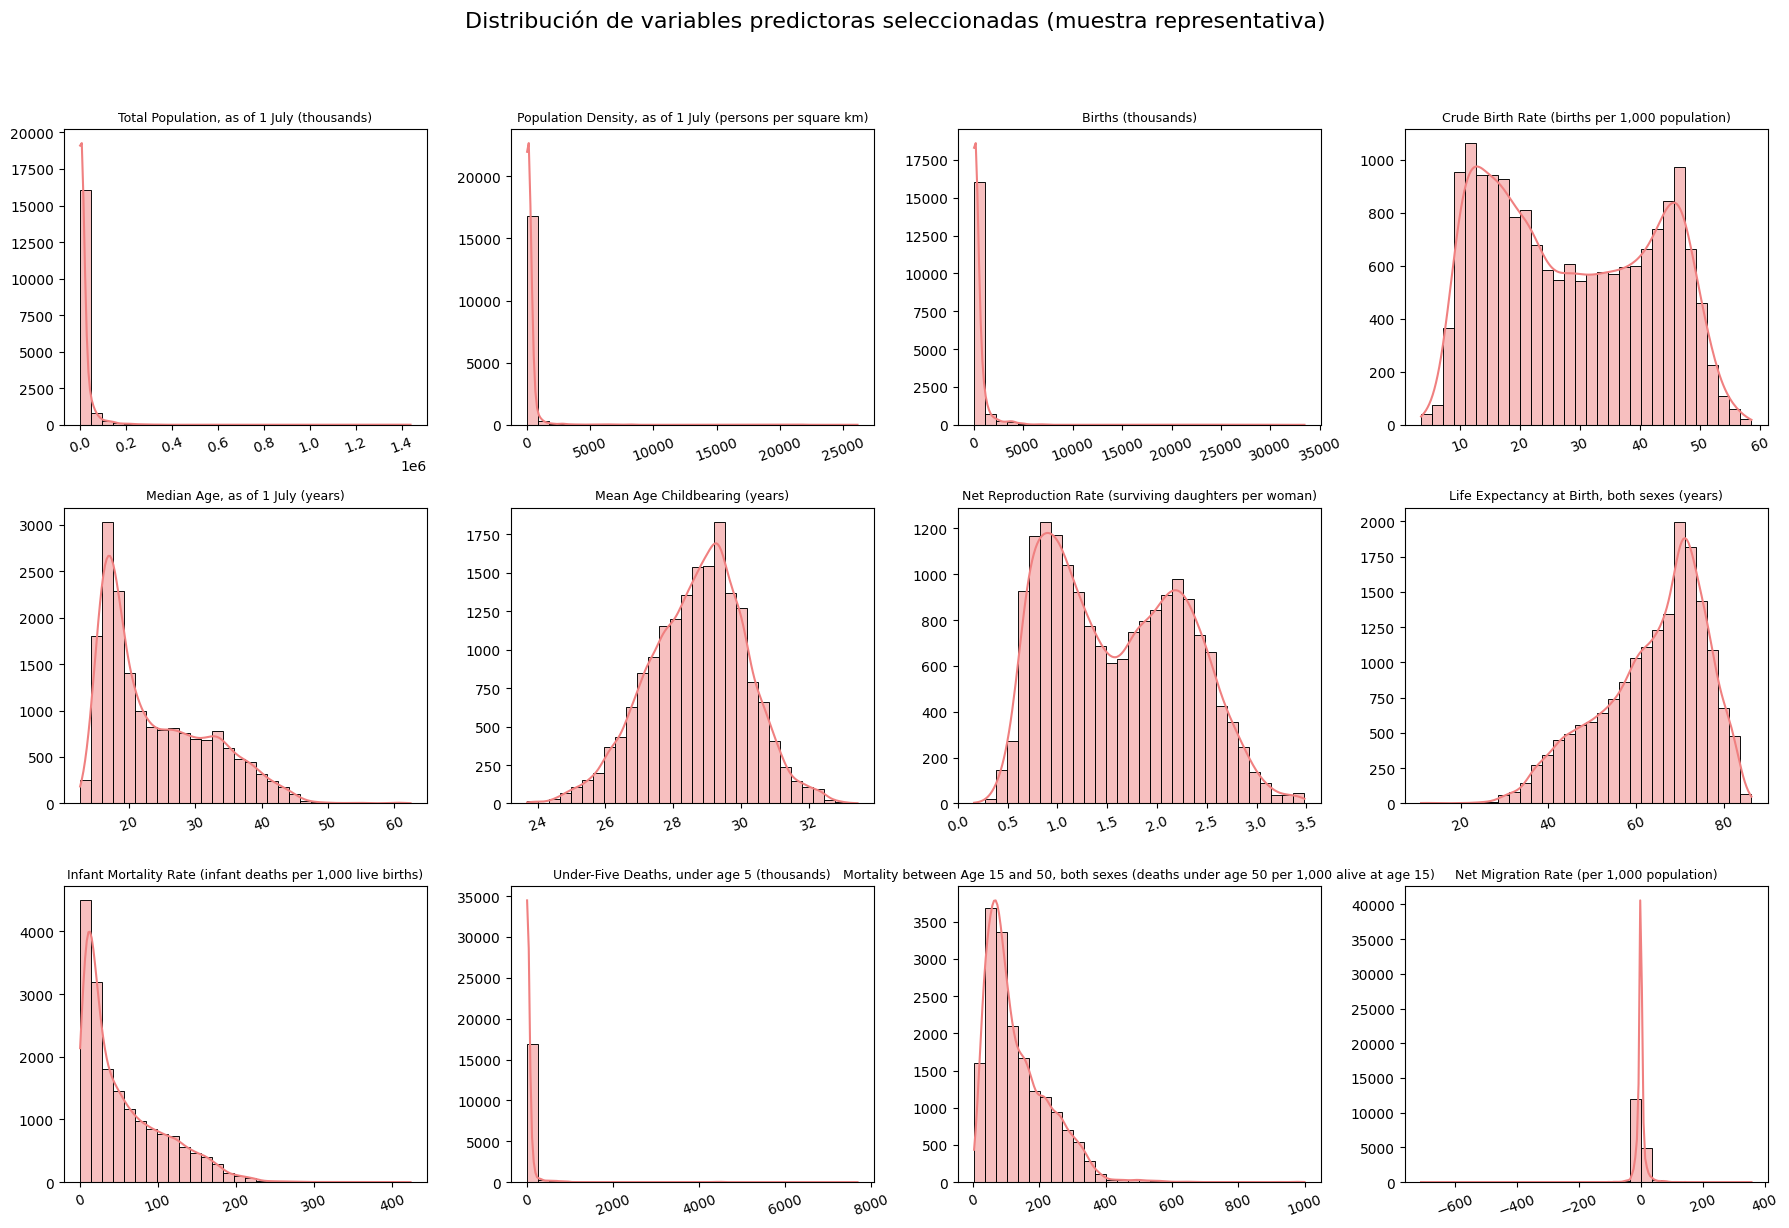

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciono variables representativas para graficar
variables_seleccionadas = [
    'Total Population, as of 1 July (thousands)',
    'Population Density, as of 1 July (persons per square km)',
    'Births (thousands)',
    'Crude Birth Rate (births per 1,000 population)',
    'Median Age, as of 1 July (years)',
    'Mean Age Childbearing (years)',
    'Net Reproduction Rate (surviving daughters per woman)',
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Under-Five Deaths, under age 5 (thousands)',
    'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
    'Net Migration Rate (per 1,000 population)'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(variables_seleccionadas):
    plt.subplot(3, 4, i + 1)
    sns.histplot(Countries[col].dropna(), kde=True, bins=30, color='lightcoral', edgecolor='black')
    plt.title(col, fontsize=9)
    plt.xticks(rotation=20)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Distribuci√≥n de variables predictoras seleccionadas (muestra representativa)", fontsize=16, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
n_paises = Countries['Region, subregion, country or area *'].nunique()
print(f"üåç N√∫mero de pa√≠ses en el dataset: {n_paises}")

üåç N√∫mero de pa√≠ses en el dataset: 237


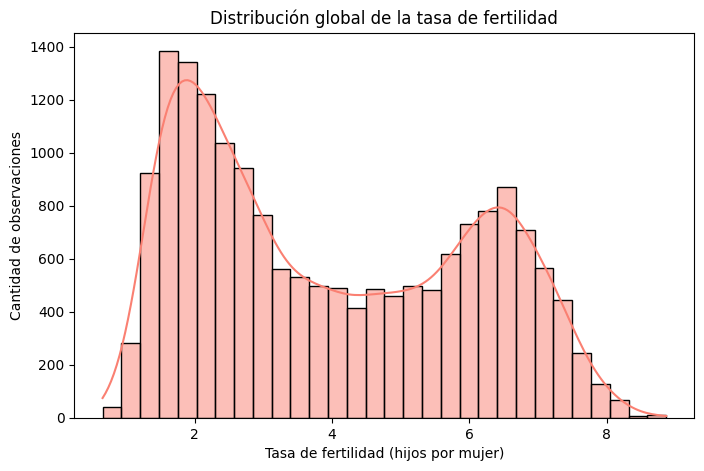

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Countries['Total Fertility Rate (live births per woman)'].dropna(), kde=True, bins=30, color='salmon')
plt.title("Distribuci√≥n global de la tasa de fertilidad")
plt.xlabel("Tasa de fertilidad (hijos por mujer)")
plt.ylabel("Cantidad de observaciones")
plt.show()

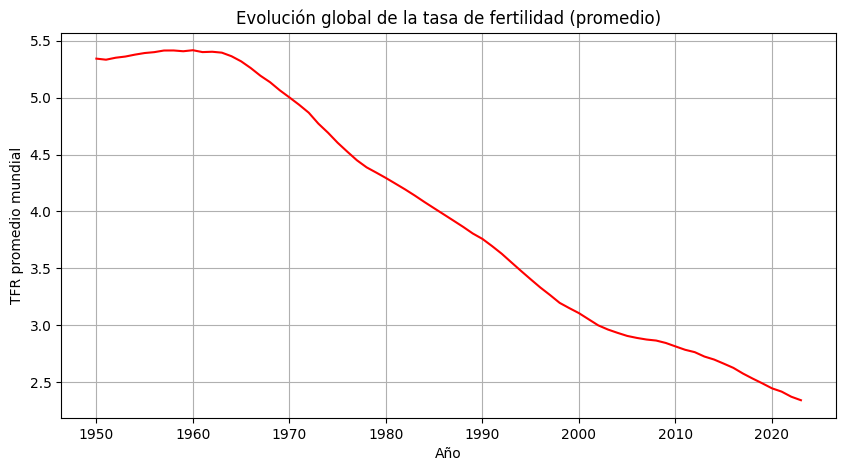

In [ ]:
df_yearly = Countries.groupby('Year')['Total Fertility Rate (live births per woman)'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, x='Year', y='Total Fertility Rate (live births per woman)', color='red')
plt.title("Evoluci√≥n global de la tasa de fertilidad (promedio)")
plt.xlabel("A√±o")
plt.ylabel("TFR promedio mundial")
plt.grid(True)
plt.show()

Voy a probar eliminando unas pocas variables que parecen redundantes a ver c√≥mo act√∫a el entrenamiento

In [ ]:
paises = Countries['Region, subregion, country or area *'].unique()

features = list(Countries.drop(columns=['Region, subregion, country or area *','Total Fertility Rate (live births per woman)']))
target = 'Total Fertility Rate (live births per woman)'

resultados = []
a√±o_corte = 2005

for pais in paises:
    df_pais = Countries[Countries['Region, subregion, country or area *'] == pais]
    df_pais = df_pais[features + [target]].dropna()
    
    try:
        X = df_pais[features]
        y = df_pais[target]

        train = X[X['Year'] <= a√±o_corte]
        test = X[X['Year'] > a√±o_corte]
        y_train = y[X['Year'] <= a√±o_corte]
        y_test = y[X['Year'] > a√±o_corte]

        if len(test) == 0:
            continue 

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(train)
        X_test_scaled = scaler.transform(test)

        modelo = LinearRegression()
        modelo.fit(X_train_scaled, y_train)
        y_pred_test = modelo.predict(X_test_scaled)

        resultados.append({
            'Pa√≠s': pais,
            'MSE': mean_squared_error(y_test, y_pred_test),
            'MAE': mean_absolute_error(y_test, y_pred_test),
            'R2': r2_score(y_test, y_pred_test),
            'Observaciones_test': len(y_test)
        })

    except Exception as e:
        print(f'Error en {pais}: {e}')
        continue

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='R2', ascending=False)
print(df_resultados)
print(df_resultados.shape)

Pa√≠s        MSE       MAE          R2  \
139                    Holy See   0.000000  0.000000    1.000000   
123                    Guernsey   0.000002  0.001227    0.999765   
132              United Kingdom   0.000006  0.001929    0.999635   
225                       Nauru   0.000070  0.006808    0.999172   
213    United States of America   0.000022  0.003473    0.999048   
..                          ...        ...       ...         ...   
101                        Oman   0.352950  0.467878  -12.314159   
100                     Lebanon   0.062706  0.166339  -12.555460   
22     Central African Republic   0.375092  0.318197  -47.653459   
75   Iran (Islamic Republic of)   1.877254  0.536709 -126.989526   
76                     Maldives  12.781870  3.095430 -137.279552   

     Observaciones_test  
139                  18  
123                  18  
132                  18  
225                  18  
213                  18  
..                  ...  
101                  18  
100                  18  
22                   18  
75                   18  
76                   18  

[237 rows x 5 columns]

(237, 5)


In [ ]:
df_resultados['Calidad_modelo'] = df_resultados['R2'].apply(lambda r: 'Buena' if r >= 0.7 else 'Mala')

buenos_modelos = df_resultados[df_resultados['R2'] >= 0.7]

print(f"{len(buenos_modelos)} de {len(df_resultados)} pa√≠ses tienen un modelo con R¬≤ ‚â• 0.7")

146 de 237 pa√≠ses tienen un modelo con R¬≤ ‚â• 0.7


In [ ]:
df_modelo = Countries.dropna(subset=features + [target]).copy()
X = df_modelo[features]
y = df_modelo[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R2 : {r2:.3f}")

MAE: 0.097
MSE: 0.027
R2 : 0.993


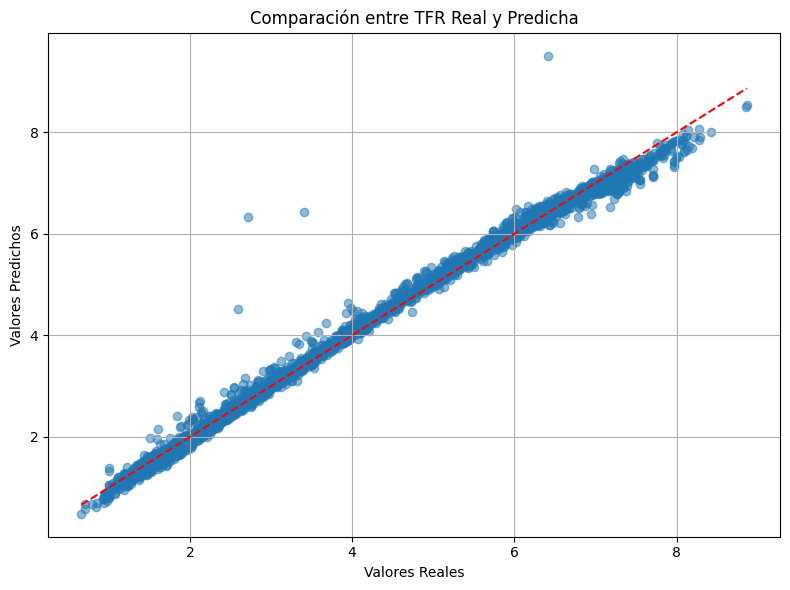

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparaci√≥n entre TFR Real y Predicha")
plt.grid(True)
plt.tight_layout()

In [15]:
un_pred = pd.read_excel("C:\\Users\\pacch\\Desktop\\Data\\CodeOp\\Proyecto\\Proyecto_natalidad\\DEMOGRAPHIC_PREDICTIONS.xlsx", header=1, index_col=None)
df2 = un_pred
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')
df2['Year'] = df2['Year'].dt.year
df2 = df2.sort_values(by=['Type', 'Year'])
Countries2 = df2[df2['Type'] == 'Country/Area']
Countries2 = Countries2.drop(columns='Population Annual Doubling Time (years)')


Countries2 = Countries2.drop(columns=['Index', 'Variant', 'Notes', 'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**', 'Type', 'Parent code'])


columns = ['Region, subregion, country or area *', 
            'Year',
            'Total Population, as of 1 July (thousands)',
            'Population Density, as of 1 July (persons per square km)',
            'Population Sex Ratio, as of 1 July (males per 100 females)',
            'Median Age, as of 1 July (years)',
            'Natural Change, Births minus Deaths (thousands)',
            'Population Growth Rate (percentage)',
            'Births (thousands)', 
            'Births by women aged 15 to 19 (thousands)',
            'Crude Birth Rate (births per 1,000 population)',
            'Total Fertility Rate (live births per woman)',
            'Net Reproduction Rate (surviving daughters per woman)',
            'Mean Age Childbearing (years)',
            'Sex Ratio at Birth (males per 100 female births)',
            'Total Deaths (thousands)',
            'Crude Death Rate (deaths per 1,000 population)',
            'Life Expectancy at Birth, both sexes (years)',
            'Female Life Expectancy at Birth (years)',
            'Life Expectancy at Age 15, both sexes (years)',
            'Life Expectancy at Age 65, both sexes (years)',
            'Life Expectancy at Age 80, both sexes (years)',
            'Infant Deaths, under age 1 (thousands)',
            'Under-Five Deaths, under age 5 (thousands)',
            'Infant Mortality Rate (infant deaths per 1,000 live births)',
            'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
            'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
            'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
            'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
            'Net Migration Rate (per 1,000 population)'
]

Countries2 = Countries2[columns]

numericas2 = list(Countries2.drop(columns='Region, subregion, country or area *'))
Countries2[numericas2] = Countries2[numericas2].apply(pd.to_numeric, errors='coerce')
df_onu = Countries2

In [ ]:
features = list(Countries.drop(columns=['Region, subregion, country or area *','Total Fertility Rate (live births per woman)']))
target = 'Total Fertility Rate (live births per woman)'
a√±o_corte = 2005

predicciones = []

paises = Countries['Region, subregion, country or area *'].unique()

for pais in paises:
    df_train = Countries[Countries['Region, subregion, country or area *'] == pais].dropna()
    df_test = Countries2[Countries2['Region, subregion, country or area *'] == pais].dropna()

    if df_train.empty or df_test.empty:
        continue

    try:
        X_train = df_train[features]
        y_train = df_train[target]
        X_test = df_test[features]
        y_test = df_test[target]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        modelo = LinearRegression()
        modelo.fit(X_train_scaled, y_train)

        y_pred = modelo.predict(X_test_scaled)

        for i in range(len(y_pred)):
            predicciones.append({
                'Pa√≠s': pais,
                'A√±o': int(df_test.iloc[i]['Year']),
                'TFR_Modelo': y_pred[i],
                'TFR_ONU': y_test.iloc[i]
            })

    except Exception as e:
        print(f"Error en {pais}: {e}")
        continue

df_comparacion = pd.DataFrame(predicciones).dropna()

mae = mean_absolute_error(df_comparacion['TFR_ONU'], df_comparacion['TFR_Modelo'])
rmse = mean_squared_error(df_comparacion['TFR_ONU'], df_comparacion['TFR_Modelo'])
r2 = r2_score(df_comparacion['TFR_ONU'], df_comparacion['TFR_Modelo'])

print("üìä Comparaci√≥n global modelo vs ONU:")
print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R¬≤  : {r2:.3f}")

metricas_por_pais = df_comparacion.groupby('Pa√≠s').apply(
    lambda g: pd.Series({
        'MAE': mean_absolute_error(g['TFR_ONU'], g['TFR_Modelo']),
        'RMSE': np.sqrt(mean_squared_error(g['TFR_ONU'], g['TFR_Modelo'])),
        'R2': r2_score(g['TFR_ONU'], g['TFR_Modelo']) if g['TFR_ONU'].nunique() > 1 else np.nan
    })
).reset_index()

print(f"\nüåç Top pa√≠ses con mejor R¬≤:")
print(metricas_por_pais.sort_values(by='R2', ascending=False).head())

print(f"\n‚úÖ Pa√≠ses con R¬≤ ‚â• 0.7: {(metricas_por_pais['R2'] >= 0.7).sum()} de {len(metricas_por_pais)}")


üìä Comparaci√≥n global modelo vs ONU:
MAE : 0.403
RMSE: 0.749
R¬≤  : -1.040

üåç Top pa√≠ses con mejor R¬≤:


C:\Users\pacch\AppData\Local\Temp\ipykernel_22560\1444163882.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metricas_por_pais = df_comparacion.groupby('Pa√≠s').apply(


Pa√≠s       MAE      RMSE        R2
111  Kazakhstan  0.016083  0.019644  0.995653
218      Tuvalu  0.027377  0.033044  0.990936
4       Andorra  0.006436  0.009571  0.989645
90     Guernsey  0.005128  0.006110  0.982730
84       Greece  0.006357  0.006786  0.978596


‚úÖ Pa√≠ses con R¬≤ ‚â• 0.7: 36 de 237


Me quedo con linear

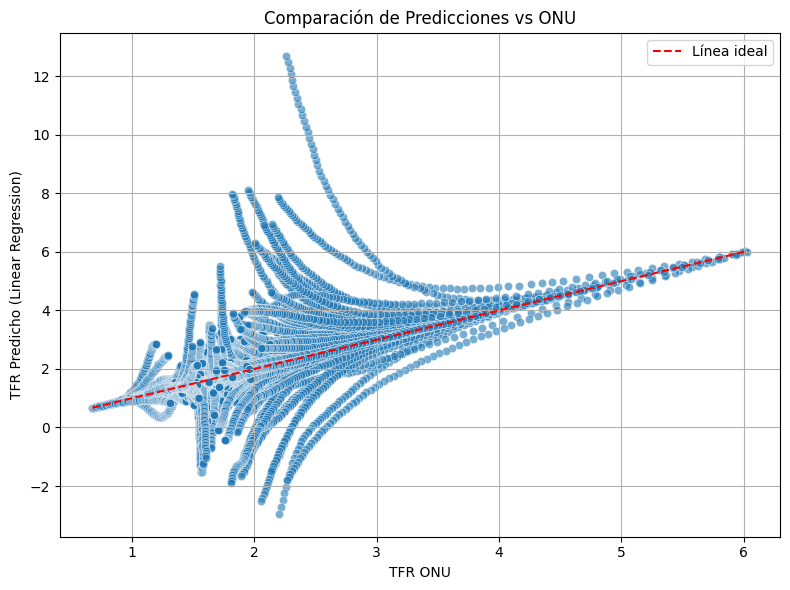

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_comparacion, x='TFR_ONU', y='TFR_Modelo', alpha=0.6)
plt.plot([df_comparacion['TFR_ONU'].min(), df_comparacion['TFR_ONU'].max()],
         [df_comparacion['TFR_ONU'].min(), df_comparacion['TFR_ONU'].max()],
         color='red', linestyle='--', label='L√≠nea ideal')
plt.xlabel('TFR ONU')
plt.ylabel('TFR Predicho (Linear Regression)')
plt.title('Comparaci√≥n de Predicciones vs ONU')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

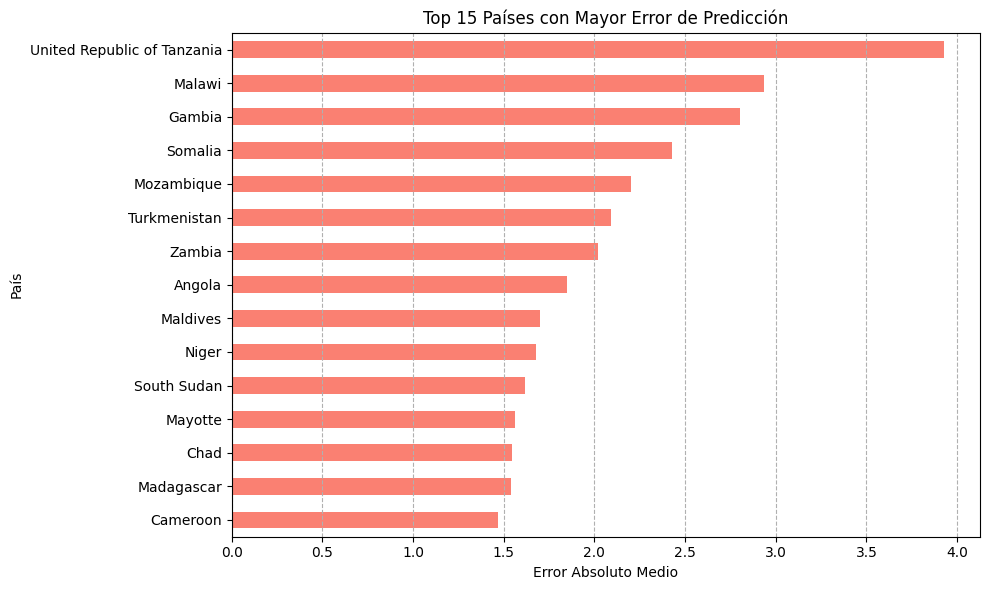

In [ ]:
df_comparacion_lr = df_comparacion
df_comparacion_lr['Error_Absoluto'] = abs(df_comparacion_lr['TFR_ONU'] - df_comparacion_lr['TFR_Modelo'])
errores_top = df_comparacion_lr.groupby('Pa√≠s')['Error_Absoluto'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
errores_top.plot(kind='barh', color='salmon')
plt.xlabel('Error Absoluto Medio')
plt.title('Top 15 Pa√≠ses con Mayor Error de Predicci√≥n')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

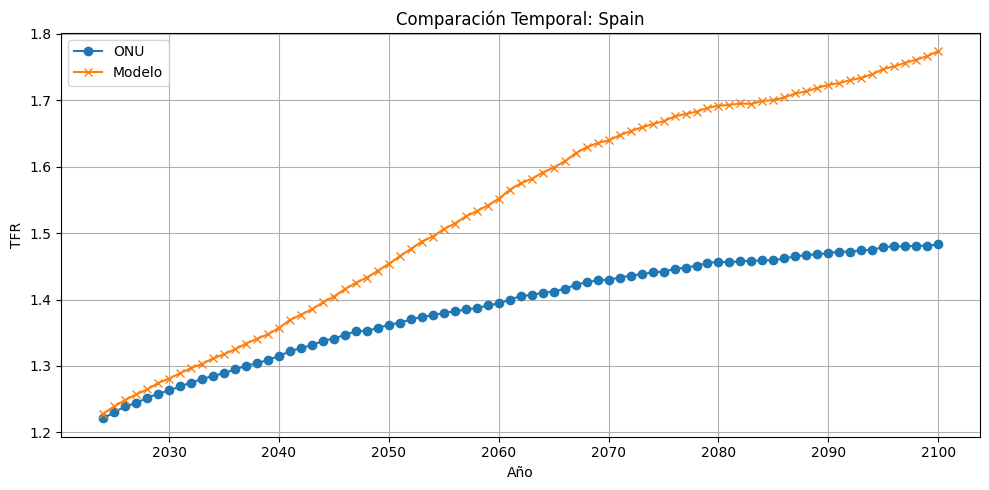

In [ ]:
pais = "Spain" 

df_pais = df_comparacion_lr[df_comparacion_lr['Pa√≠s'] == pais]

plt.figure(figsize=(10, 5))
plt.plot(df_pais['A√±o'], df_pais['TFR_ONU'], label='ONU', marker='o')
plt.plot(df_pais['A√±o'], df_pais['TFR_Modelo'], label='Modelo', marker='x')
plt.title(f'Comparaci√≥n Temporal: {pais}')
plt.xlabel('A√±o')
plt.ylabel('TFR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\pacch\AppData\Local\Temp\ipykernel_22560\1422473726.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_comparacion_lr, x='A√±o', y='TFR_Modelo', ci=None, estimator='mean')


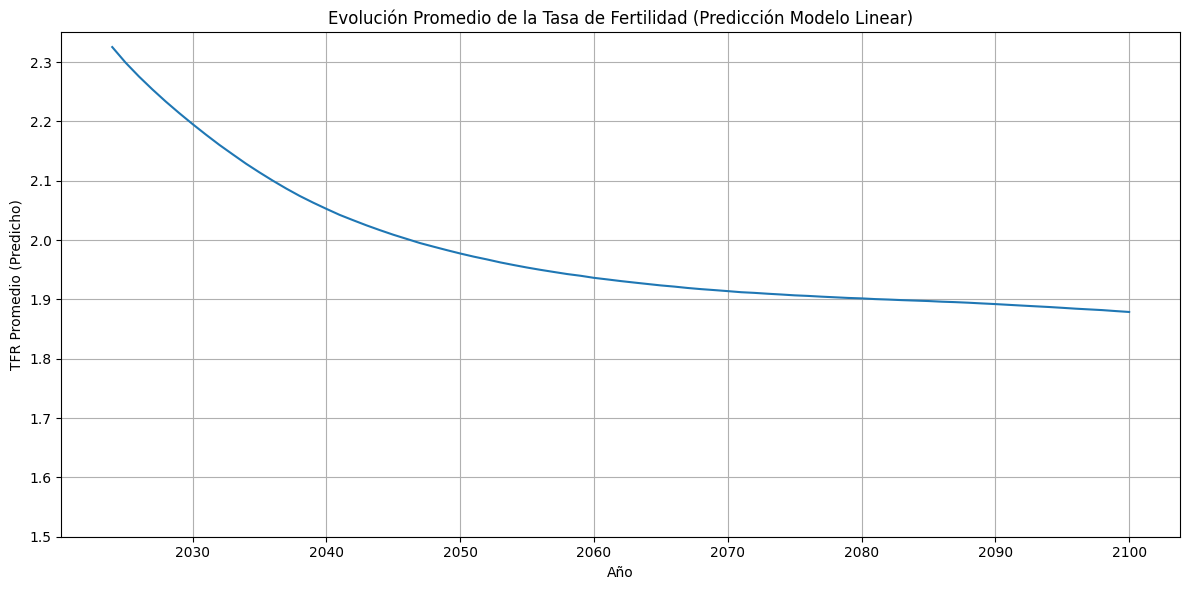

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comparacion_lr, x='A√±o', y='TFR_Modelo', ci=None, estimator='mean')
plt.title('Evoluci√≥n Promedio de la Tasa de Fertilidad (Predicci√≥n Modelo Linear)')
plt.xlabel('A√±o')
plt.ylabel('TFR Promedio (Predicho)')
plt.ylim(1.5, 2.35)  
plt.grid(True)
plt.tight_layout()
plt.show()

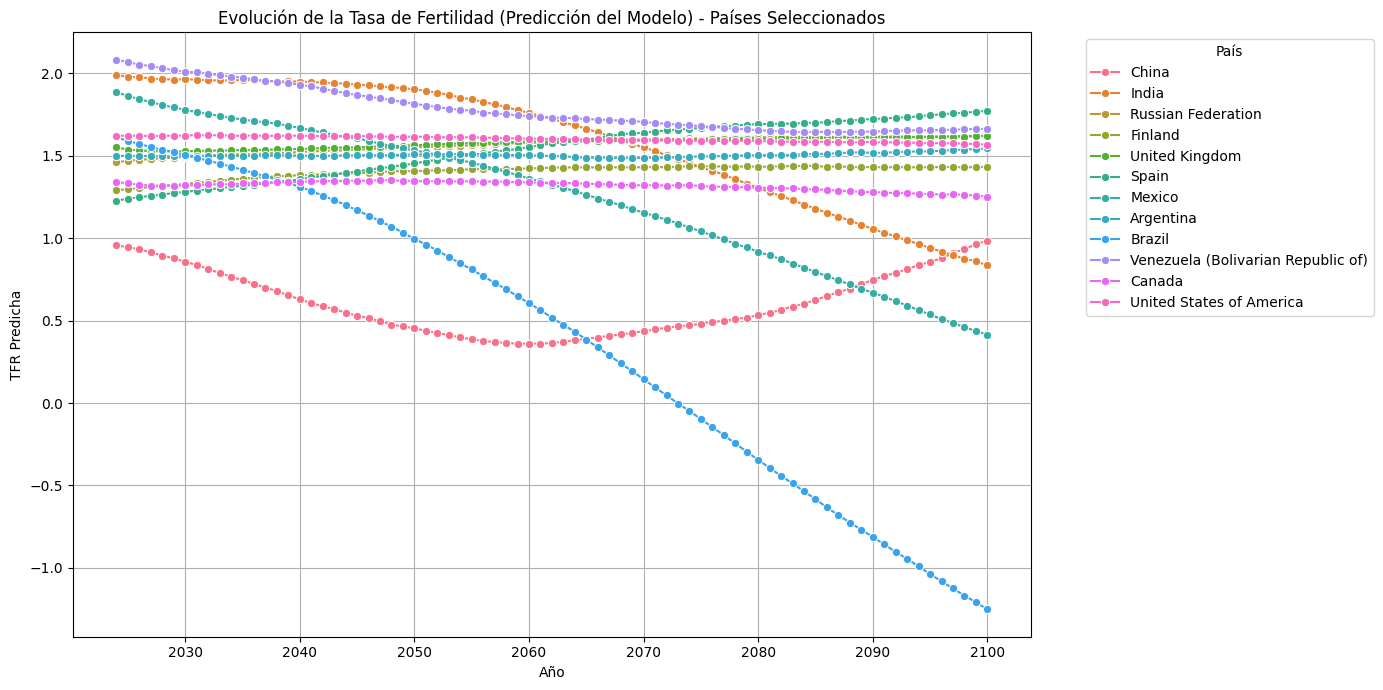

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

paises = [
    'United States of America', 'Spain', 'United Kingdom', 'Russian Federation', 
    'India', 'Venezuela (Bolivarian Republic of)', 'Argentina', 'Brazil', 
    'Mexico', 'Finland', 'Canada', 'China'
]

df_seleccion = df_comparacion_lr[df_comparacion_lr['Pa√≠s'].isin(paises)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_seleccion, x='A√±o', y='TFR_Modelo', hue='Pa√≠s', marker='o')

plt.title('Evoluci√≥n de la Tasa de Fertilidad (Predicci√≥n del Modelo) - Pa√≠ses Seleccionados')
plt.xlabel('A√±o')
plt.ylabel('TFR Predicha')
plt.legend(title='Pa√≠s', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_pred = df_comparacion_lr

resumen_riesgo = df_pred.groupby('Pa√≠s').agg(
    TFR_minima=('TFR_Modelo', 'min'),
    TFR_maxima=('TFR_Modelo', 'max'),
    TFR_promedio=('TFR_Modelo', 'mean')
).reset_index()

def clasificar_riesgo(min_tfr):
    if min_tfr < 1.0:
        return 'Alto'
    elif min_tfr < 2.1:
        return 'Medio'
    else:
        return 'Bajo'

resumen_riesgo['Riesgo_TFR'] = resumen_riesgo['TFR_minima'].apply(clasificar_riesgo)

resumen_riesgo = resumen_riesgo.sort_values(by='TFR_minima')

print(resumen_riesgo.head()) 

Pa√≠s  TFR_minima  TFR_maxima  TFR_promedio Riesgo_TFR
136       Mayotte   -2.950160    4.566638      1.492166       Alto
126    Madagascar   -2.518288    3.905118      1.142205       Alto
216  Turkmenistan   -1.892834    2.629202     -0.018558       Alto
40           Chad   -1.792391    6.013544      2.008181       Alto
199   South Sudan   -1.650821    3.787569      0.848297       Alto

In [41]:
resumen_riesgo.sort_values(by='TFR_minima', ascending=False).tail(10)

Pa√≠s  TFR_minima  TFR_maxima  TFR_promedio Riesgo_TFR
46       Colombia   -1.041060    1.638008      0.636823       Alto
220        Uganda   -1.184879    4.158370      1.484314       Alto
28         Brazil   -1.250900    1.612448      0.389671       Alto
21          Benin   -1.503489    4.474841      1.733382       Alto
129      Maldives   -1.525117    1.551648     -0.150236       Alto
199   South Sudan   -1.650821    3.787569      0.848297       Alto
40           Chad   -1.792391    6.013544      2.008181       Alto
216  Turkmenistan   -1.892834    2.629202     -0.018558       Alto
126    Madagascar   -2.518288    3.905118      1.142205       Alto
136       Mayotte   -2.950160    4.566638      1.492166       Alto

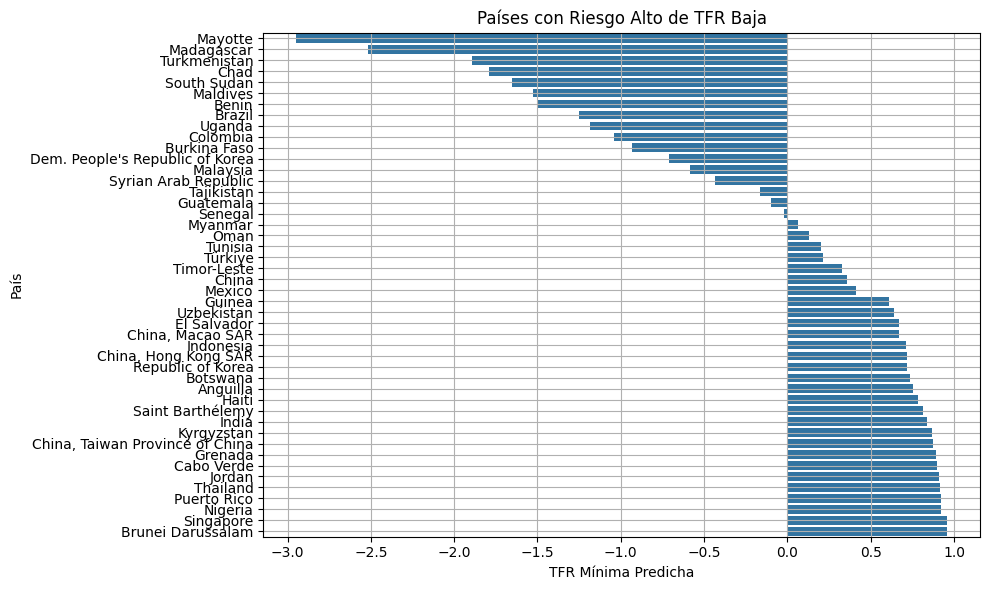

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_alto_riesgo = resumen_riesgo[resumen_riesgo['Riesgo_TFR'] == 'Alto']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_alto_riesgo, x='TFR_minima', y='Pa√≠s', order=df_alto_riesgo.sort_values('TFR_minima')['Pa√≠s'])
plt.title('Pa√≠ses con Riesgo Alto de TFR Baja')
plt.xlabel('TFR M√≠nima Predicha')
plt.ylabel('Pa√≠s')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
df_comparacion.head()

Pa√≠s   A√±o  TFR_Modelo  TFR_ONU  Error_Absoluto
0  Burundi  2024    4.792707    4.789        0.003707
1  Burundi  2025    4.669044    4.675        0.005956
2  Burundi  2026    4.555954    4.566        0.010046
3  Burundi  2027    4.450139    4.463        0.012861
4  Burundi  2028    4.362389    4.372        0.009611

Ahora con CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

historical_df = Countries.copy()
onu_df = Countries2.copy()

features = list(historical_df.drop(columns=['Region, subregion, country or area *', 'Total Fertility Rate (live births per woman)']))
target = 'Total Fertility Rate (live births per woman)'

predicciones = []

paises = sorted(set(historical_df['Region, subregion, country or area *']).intersection(set(onu_df['Region, subregion, country or area *'])))

for pais in paises:
    df_train = historical_df[historical_df['Region, subregion, country or area *'] == pais].dropna()
    df_test = onu_df[onu_df['Region, subregion, country or area *'] == pais].dropna()

    if df_train.empty or df_test.empty:
        continue

    try:
        X_train = df_train[features]
        y_train = df_train[target]
        X_test = df_test[features]
        y_test = df_test[target]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        modelo = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42)
        modelo.fit(X_train_scaled, y_train)

        y_pred = modelo.predict(X_test_scaled)

        for i in range(len(y_pred)):
            predicciones.append({
                'Pa√≠s': pais,
                'A√±o': int(df_test.iloc[i]['Year']),
                'TFR_Modelo': y_pred[i],
                'TFR_ONU': y_test.iloc[i]
            })

    except Exception as e:
        print(f"Error en {pais}: {e}")
        continue

df_comparacion_cb = pd.DataFrame(predicciones).dropna()

mae_cb = mean_absolute_error(df_comparacion_cb['TFR_ONU'], df_comparacion_cb['TFR_Modelo'])
rmse_cb = mean_squared_error(df_comparacion_cb['TFR_ONU'], df_comparacion_cb['TFR_Modelo'])
r2_cb = r2_score(df_comparacion_cb['TFR_ONU'], df_comparacion_cb['TFR_Modelo'])

print("üìä Comparaci√≥n global modelo CatBoost vs ONU:")
print(f"MAE : {mae_cb:.3f}")
print(f"RMSE: {rmse_cb:.3f}")
print(f"R¬≤  : {r2_cb:.3f}")

print(df_comparacion_cb.head())

NameError: name 'hola' is not defined

In [35]:
df_comparacion_lr.head()

Pa√≠s   A√±o  TFR_Modelo  TFR_ONU  Error_Absoluto
0  Burundi  2024    4.792707    4.789        0.003707
1  Burundi  2025    4.669044    4.675        0.005956
2  Burundi  2026    4.555954    4.566        0.010046
3  Burundi  2027    4.450139    4.463        0.012861
4  Burundi  2028    4.362389    4.372        0.009611